In [1]:
import axelrod as axl
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
strategies = [s for s in axl.ordinary_strategies if not s().classifier['stochastic']] 

In [3]:
players = [s() for s in strategies]

In [13]:
def binomial_random_spatial_touranment(p):
    """Run a random tournament with a binomial 
       structure.
    """
    G = nx.binomial_graph(len(players), .5)
    edges = G.edges()
    tournament = axl.SpatialTournament(players, edges=G.edges(), turns = 200, repetitions=1)
    return tournament.play(processes=0)

In [8]:
def lattice_spatial_tournament():
    """Run a tournament with a square
       lattice, with four neighboors,
       structure.
    """
    G = nx.newman_watts_strogatz_graph(len(players), 4, 0)
    edges = G.edges()
    tournament = axl.SpatialTournament(players, edges=G.edges(), processes=0, repetitions=1)
    return tournament.play()

In [9]:
def small_world_adding_edges(p):
    """A tournament with a small-world
       structure. But it randomly
       adds edges
    """
    G = nx.newman_watts_strogatz_graph(len(players), 4, p)
    edges = G.edges()
    tournament = axl.SpatialTournament(players, edges=G.edges(), turns = 200, repetitions=1)
    return tournament.play()

In [14]:
    results = []
for p in range(0, 100):
    p /= 100
    results.append([p, binomial_random_spatial_touranment(p)])

Analysing results:  37%|███▋      | 7/19 [00:09<00:05,  2.02it/s]

KeyboardInterrupt: 

In [5]:
results = lattice_spatial_tournament()

In [6]:
results.ranked_names

['Win-Stay Lose-Shift',
 'Cooperator Hunter',
 'Fool Me Once',
 'BackStabber',
 'Eventual Cycle Hunter',
 'Anti Tit For Tat',
 'Gradual',
 'Adapative Pavlov 2011',
 'Forgetful Grudger',
 'Predator',
 'Soft Go By Majority: 20',
 'Inverse Punisher',
 'Limited Retaliate (0.1/20)',
 'Limited Retaliate (0.08/15)',
 'Limited Retaliate (0.05/20)',
 'EvolvedLookerUp',
 'Math Constant Hunter',
 'Nydegger',
 'Omega TFT',
 'Grudger',
 'Shubik',
 'Hard Tit For 2 Tats',
 'Sneaky Tit For Tat',
 'DoubleCrosser',
 'Soft Grudger',
 'Adapative Pavlov 2006',
 'Two Tits For Tat',
 'Forgiver',
 'Contrite Tit For Tat',
 'Cycle Hunter',
 'Thumper',
 'Tit For Tat',
 'Soft Go By Majority: 10',
 'Once Bitten',
 'Bully',
 'Appeaser',
 'Soft Go By Majority',
 'Adaptive',
 'Tit For 2 Tats',
 'Hard Tit For Tat',
 'Retaliate (0.1)',
 'Retaliate (0.08)',
 'Retaliate (0.05)',
 'Soft Go By Majority: 40',
 'Raider',
 'Grumpy',
 'Defector Hunter',
 'Tricky Defector',
 'Meta Hunter',
 'Soft Go By Majority: 5',
 'Cycler CC

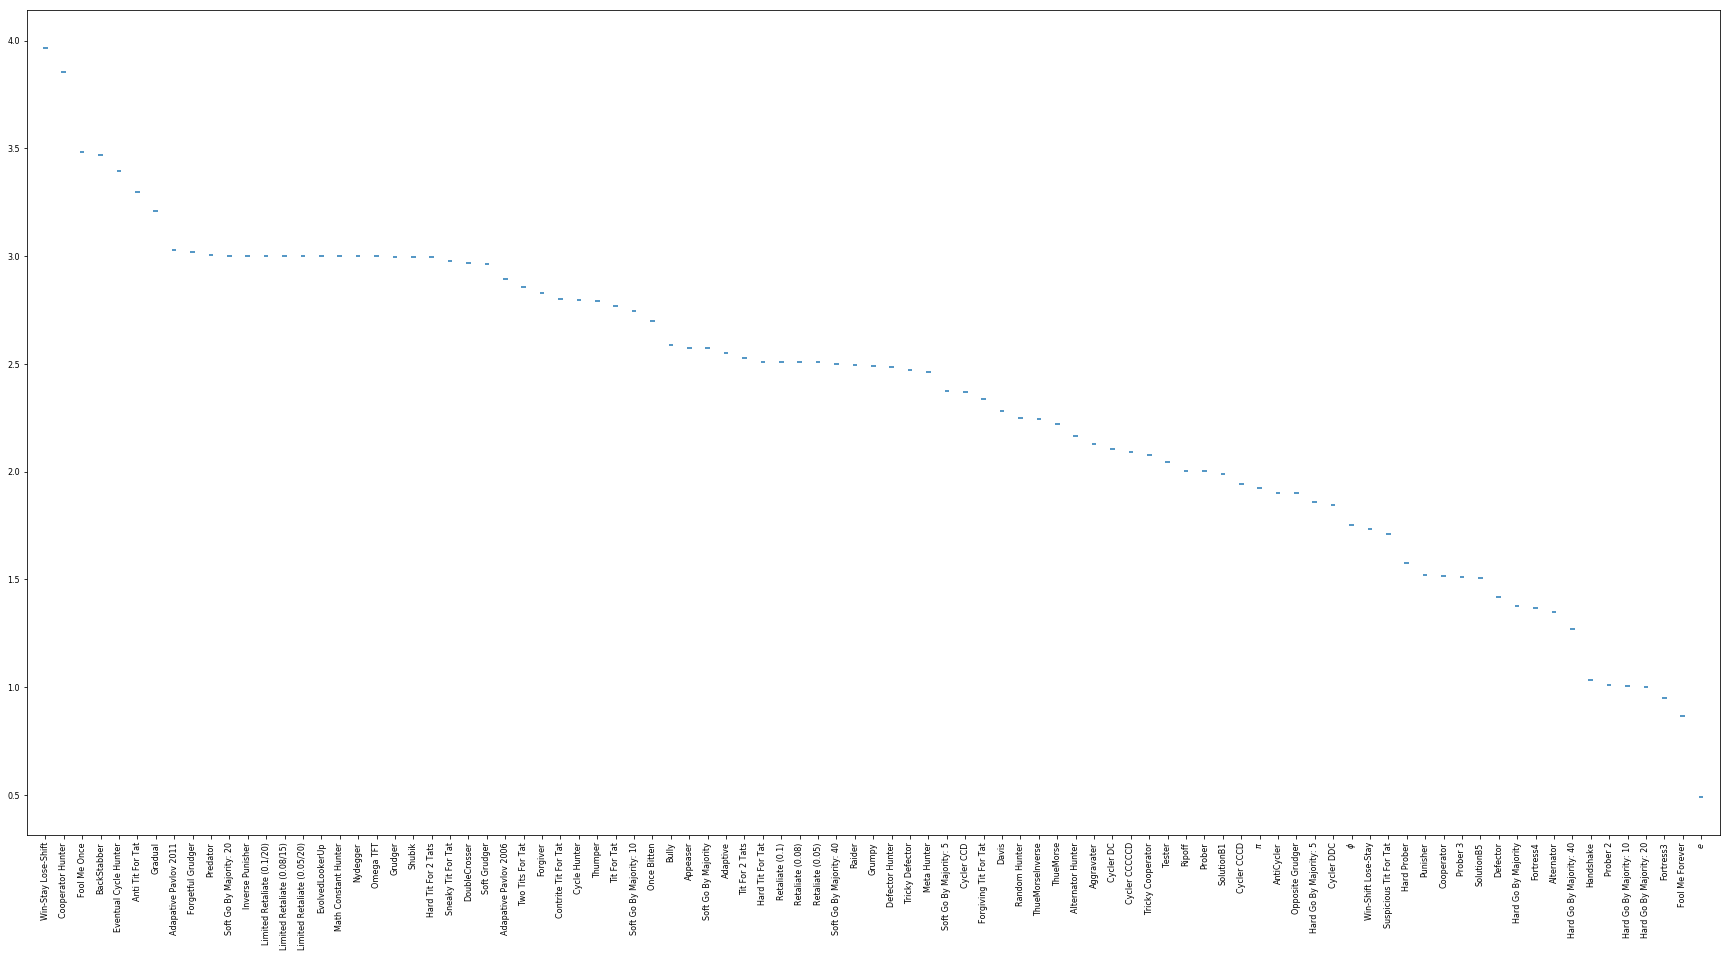

In [7]:
plot = axl.Plot(results)
plot.boxplot();

In [ ]:
#  watts_strogatz_graph for rewiring each edge